<a href="https://colab.research.google.com/github/JenioDwiSetyoFavianGian/PCVK_Ganjil_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

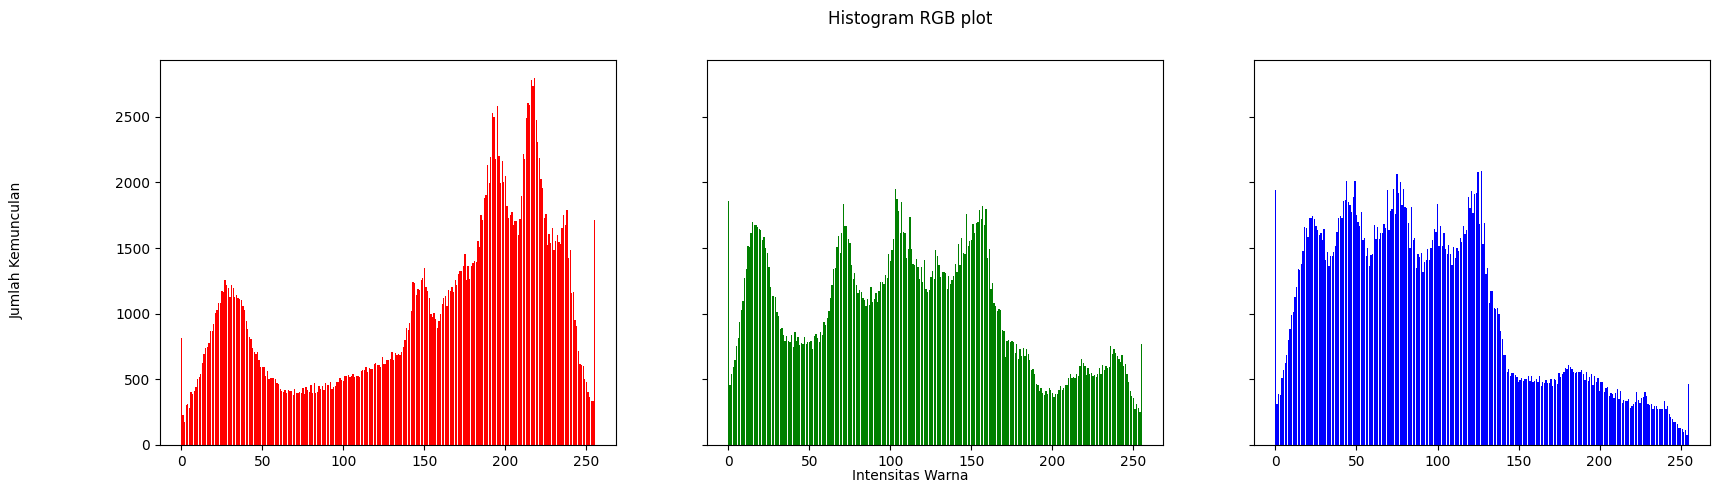

In [ ]:
# Tugas 3
# Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena.jpg)

image = cv.imread('/content/drive/MyDrive/PCVK2023/Images/lena.jpg')
height, width, depth = np.shape(image)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[image[y][x][0]] += 1
    green[image[y][x][1]] += 1
    red[image[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')


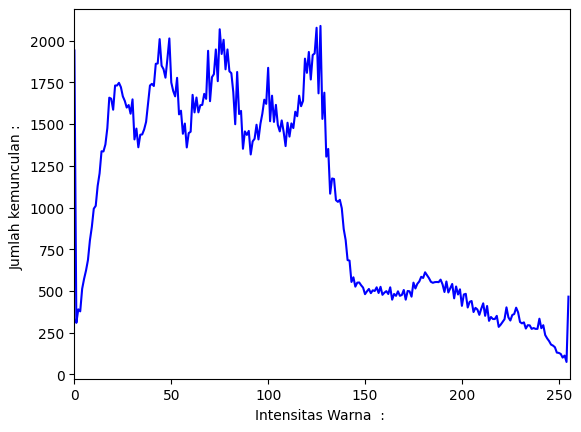

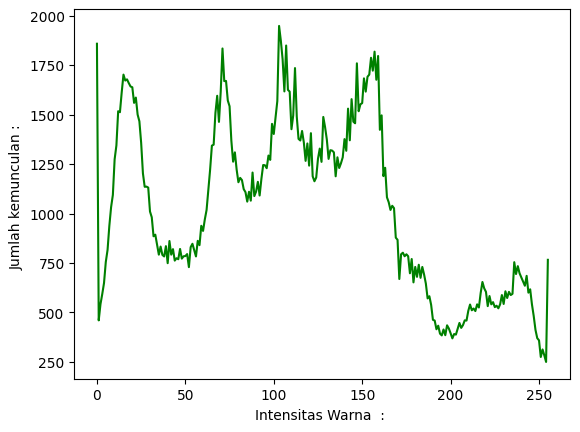

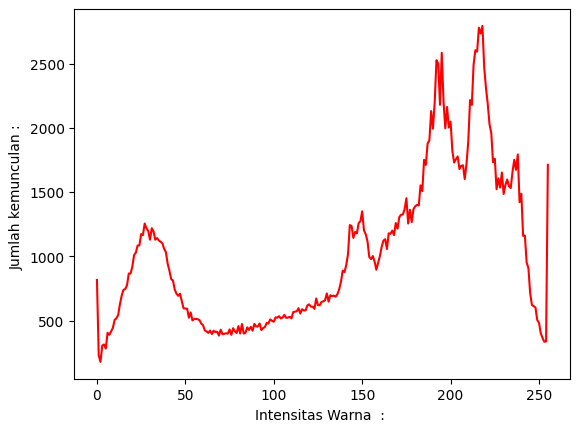

In [ ]:
# Tugas 4
# Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
# menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan hasilnya. Apakah output muncul sama?

colors = ("b","g","r")
channel_ids = (0, 1, 2)

plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      image[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna  : ")
  plt.ylabel("Jumlah kemunculan : ")

  plt.show()

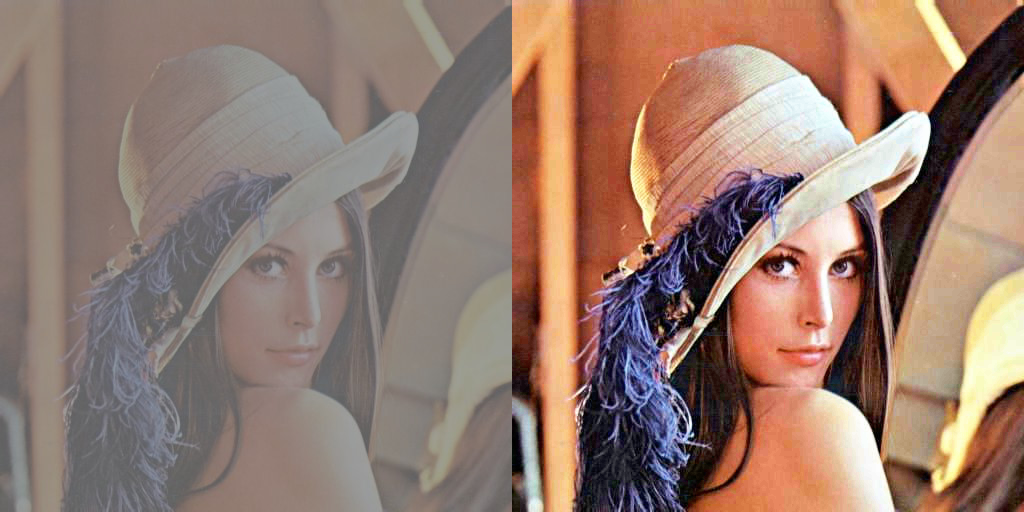

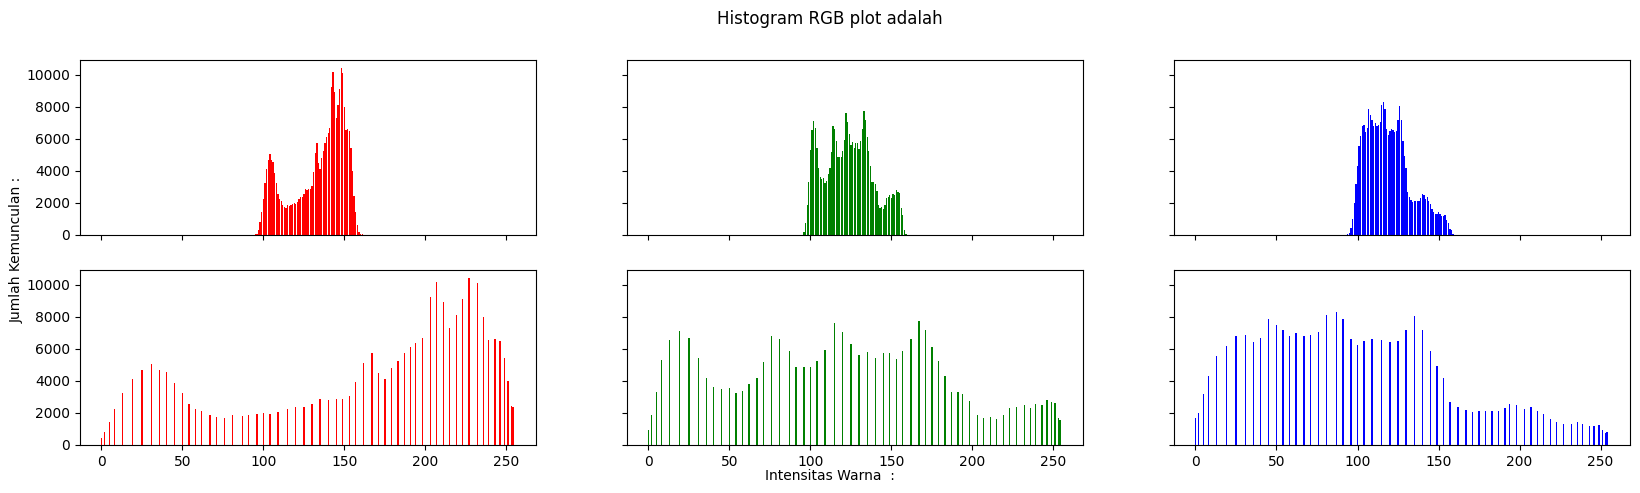

In [ ]:
# Tugas 5
# Buatlah histogram citra seperti output histogram equalization dan juga tampilan
# gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)
img = cv.imread('/content/drive/MyDrive/PCVK2023/Images/lena_lc.jpg')
def histog(img):
  height, width, depth = np.shape(img)
  ax = np.zeros((3,256))
  for y in range(0,height) :
    for x in range(0,width) :
      ax[0][img[y][x][0]] += 1
      ax[1][img[y][x][1]] += 1
      ax[2][img[y][x][2]] += 1
  return ax

histogram_asli = histog(img)


img_array = np.asarray(img)


histogram_array = np.bincount(img_array.flatten(), minlength=256)

# Normalize
num_pixels = np. sum(histogram_array)
histogram_array = histogram_array/num_pixels


cum_histo = np.cumsum(histogram_array)


transform_map = np.floor(255 * cum_histo). astype (np.uint8)


img_list = list(img_array.flatten())


eq_img_list = [transform_map[p] for p in img_list]


eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape)
img2 = eq_img_array

equal_histo = histog(img2)

final_frame = cv.hconcat((img, img2))
cv2_imshow(final_frame)

names = np.arange (256)
isgrayimg = np.array_equal(blue, green, red)
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot adalah')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan :', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna  :', ha='center')
  axs[0,0].bar(names, histogram_asli[2], color='red')
  axs[0,1].bar(names, histogram_asli[1], color='green')
  axs[0,2].bar(names, histogram_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig. suptitle('Histogram RGB plot adalah')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histogram_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

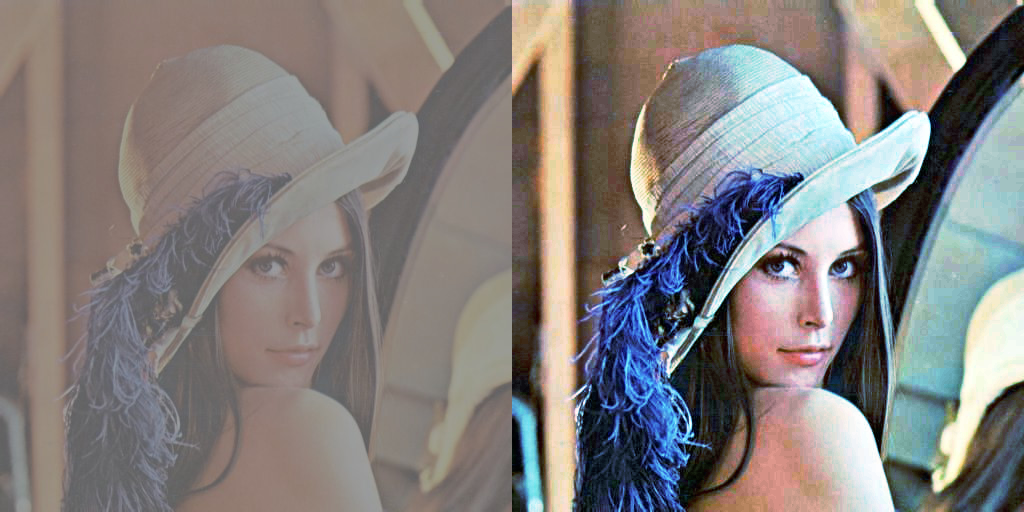

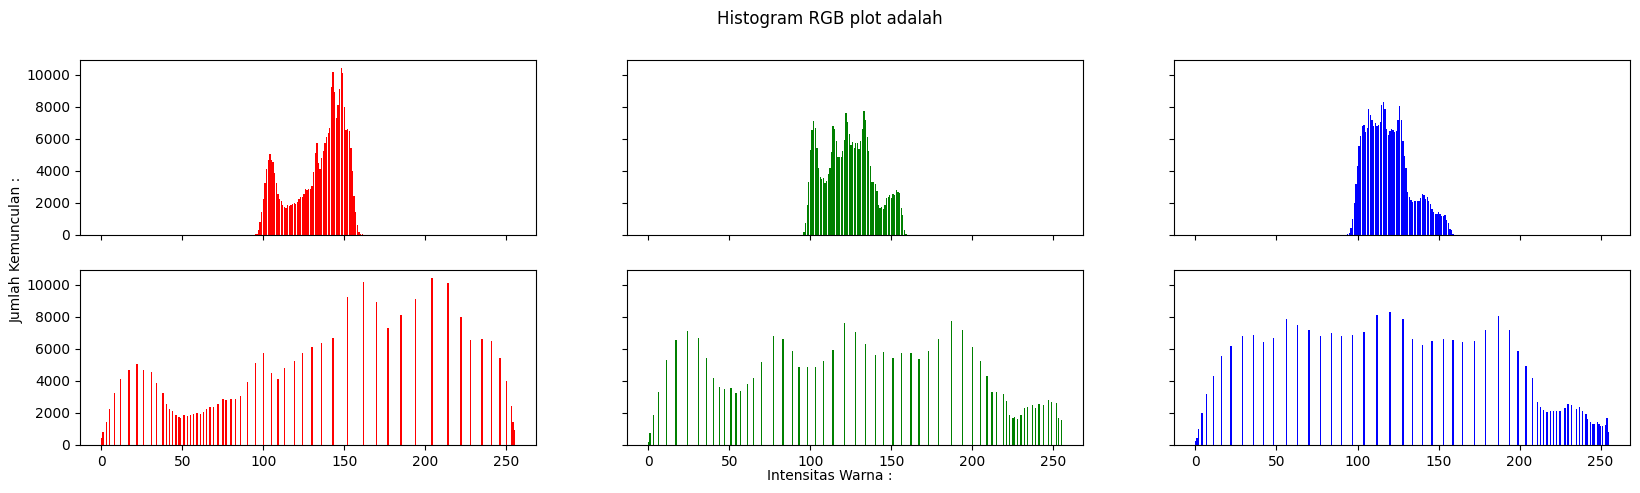

In [ ]:
# Tugas 6
# Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
# menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan hasilnya. Apakah output muncul sama?
lena_lc = cv.imread('/content/drive/MyDrive/PCVK2023/Images/lena_lc.jpg')
channels = cv.split(lena_lc)
eq_channels = []
for ch, color in zip(channels, ['R', 'G', 'B']):
  eq_channels.append(cv.equalizeHist(ch))
eq_image = cv.merge(eq_channels)
equal_histo = histog(eq_image)

final_frame = cv.hconcat((lena_lc, eq_image))
cv2_imshow(final_frame)

names = np.arange(256)
isgraying = np.array_equal(blue, green, red)
if (isgraying == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot adalah')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan :', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna :', ha='center')
  axs[0,0].bar(names, histogram_asli[2], color='red')
  axs[0,1].bar(names, histogram_asli[1], color='green')
  axs[0,2].bar(names, histogram_asli[0], color='blue')
  axs[1,0].bar(names, equal_histo[2], color='red')
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot adalah')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan :', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna  :', ha='center')
  axs[0,0].bar(names, histogram_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')


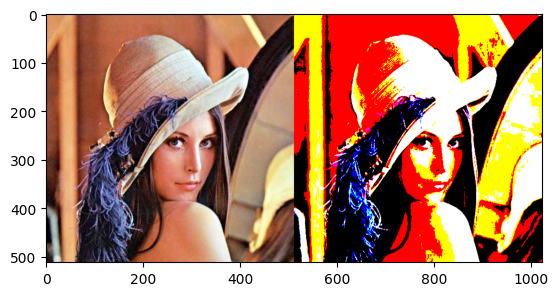

In [ ]:
# Tugas 7
# Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
# hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart di bawah ini! (Gunakan gambar lena.jpg)
lena_original = plt.imread('/content/drive/MyDrive/PCVK2023/Images/lena.jpg')

def WarnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  WarnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(WarnaPallette)):
    rDiff = r - WarnaPallette[i][0]
    gDiff = g - WarnaPallette[i][1]
    bDiff = b - WarnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

WarnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16jt = lena_original
img_8 = np.zeros(img_16jt.shape, img_16jt.dtype)

for y in range(0, img_16jt.shape[0]):
  for x in range(0, img_16jt.shape[1]):
    baru = WarnaTerdekat(img_16jt[y, x, 0], img_16jt[y, x, 1], img_16jt[y, x, 2])
    img_8[y, x] = WarnaPallette[baru]

final_frame = cv.hconcat((img_16jt, img_8))
plt.imshow(final_frame)

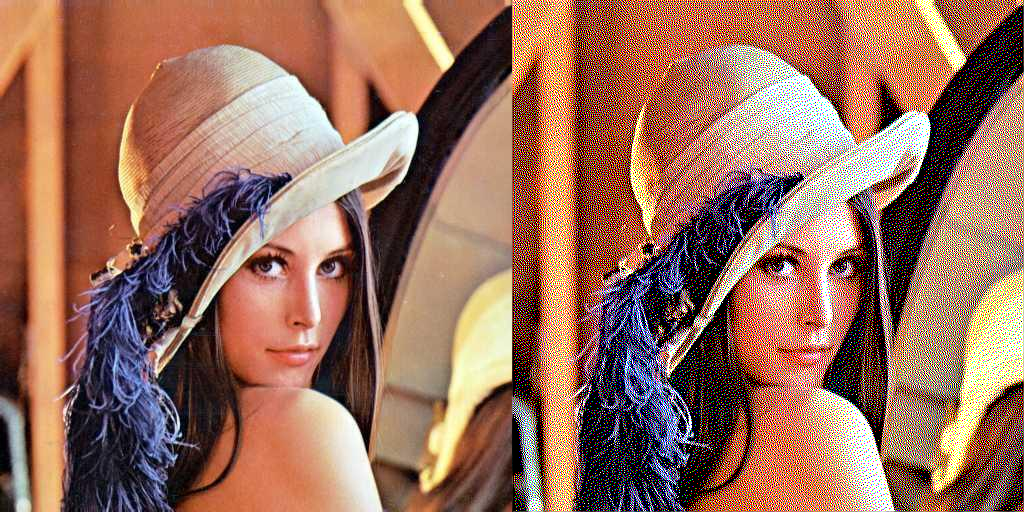

In [40]:
# Tugas 8
# Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
# awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman modul ini! (Gunakan gambar lena.jpg)
lena_dithering = cv.imread('/content/drive/MyDrive/PCVK2023/Images/lena.jpg')
image_after = lena_dithering.copy()

def minmax(v):
    if v > 255:
        v = 255
    if v < 0:
        v = 0
    return v

def dithering_color(img, jarakPixel):
    # mengambil dimensi gambar
    h = img.shape[0]
    w = img.shape[1]

    # akses pixel
    for y in range(0, h-1):
        for x in range(1, w-1):
            # jarak pixel tetangga
            b = img[y, x, 0]
            g = img[y, x, 1]
            r = img[y, x, 2]

            # menghitung pixel baru berdasarkan jarak dan juga batasan warna yang dimiliki
            new_b = np.round(jarakPixel * b/255.0) * (255/jarakPixel)
            new_g = np.round(jarakPixel * g/255.0) * (255/jarakPixel)
            new_r = np.round(jarakPixel * r/255.0) * (255/jarakPixel)

            img[y, x, 0] = new_b
            img[y, x, 1] = new_g
            img[y, x, 2] = new_r

            # Menghitung kuantisasi error untuk masuk rumus
            quant_error_b = b - new_b
            quant_error_g = g - new_g
            quant_error_r = r - new_r

            # implementasi rumus dithering Floyd and Steinberg
            img[y, x+1, 0] = minmax(img[y, x+1, 0] + quant_error_b * 7 / 16.0)
            img[y, x+1, 1] = minmax(img[y, x+1, 1] + quant_error_g * 7 / 16.0)
            img[y, x+1, 2] = minmax(img[y, x+1, 2] + quant_error_r * 7 / 16.0)

            img[y+1, x-1, 0] = minmax(img[y+1, x-1, 0] + quant_error_b * 3 / 16.0)
            img[y+1, x-1, 1] = minmax(img[y+1, x-1, 1] + quant_error_g * 3 / 16.0)
            img[y+1, x-1, 2] = minmax(img[y+1, x-1, 2] + quant_error_r * 3 / 16.0)


            img[y+1, x, 0] = minmax(img[y+1, x, 0] + quant_error_b * 5 / 16.0)
            img[y+1, x, 1] = minmax(img[y+1, x, 1] + quant_error_g * 5 / 16.0)
            img[y+1, x, 2] = minmax(img[y+1, x, 2] + quant_error_r * 5 / 16.0)


            img[y+1, x+1, 0] = minmax(img[y+1, x+1, 0] + quant_error_b * 1 / 16.0)
            img[y+1, x+1, 1] = minmax(img[y+1, x+1, 1] + quant_error_g * 1 / 16.0)
            img[y+1, x+1, 2] = minmax(img[y+1, x+1, 2] + quant_error_r * 1 / 16.0)

    return img

image_after = dithering_color(image_after, 1)
final_frame = cv.hconcat((lena_dithering, image_after))
cv2_imshow(final_frame)

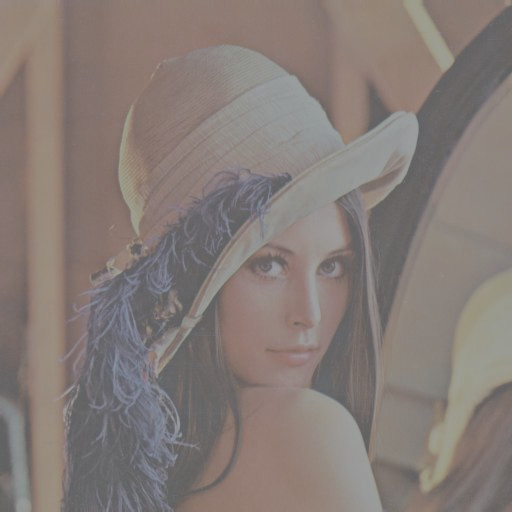

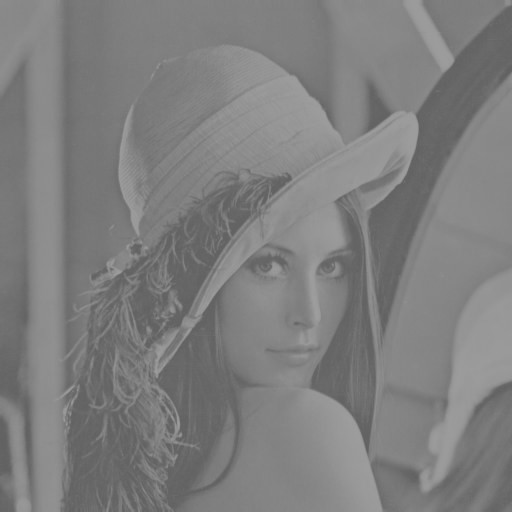

In [ ]:
# Tugas 9
# Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
# equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
# histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga menampilkan gambar di bawah ini!

img_ori = cv.imread('/content/drive/MyDrive/PCVK2023/Images/lena_lc.jpg')

img_gray= cv.imread('/content/drive/MyDrive/PCVK2023/Images/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# Display the img_ori and img_gray
cv2_imshow(img_ori)
cv2_imshow(img_gray)

In [ ]:
Image = cv.imread('/content/drive/MyDrive/PCVK_MM/Images/wiki.jpg')

GrayImage = cv.cvtColor(Image, cv.COLOR_BGR2GRAY)
cv.imwrite('/content/drive/MyDrive/PCVK_MM/Images/wiki.jpg', GrayImage)

Height = GrayImage.shape[0]
Width = GrayImage.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = GrayImage[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        GrayImage[y, x] = new_value

        Error = old_value - new_value

        if (x255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y, x+1] = NewNumber

        if (x>0 and y255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x-1] = NewNumber

        if (y255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x] = NewNumber

        if (y255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            GrayImage[y+1, x+1] = NewNumber

cv.imwrite('/content/drive/MyDrive/PCVK_MM/Images/wiki.jpg', GrayImage)
cv2_imshow(GrayImage)


IndentationError: ignored